# Mode
The mode is the value that appears most frequently in a dataset. Unlike mean and median, the mode can be used with both numerical and categorical data.

- **Most frequent value:** Identifies the most common observation
- **Works with categorical data:** The only measure of central tendency that works with non-numerical data
- **Multiple modes possible:** A dataset can have no mode, one mode, or multiple modes
- **Not affected by outliers:** Extreme values don't influence the mode

**When to Use Mode**

Use Mode If:
- Categorical data (colors, brands, types)
- Identifying peaks in distributions
- Most common category or preference
- Nominal data where mathematical operations don't make sense
- Quick insight into popular choices

Don't Use Mode If:
- You need a mathematical average for calculations
- Data has many unique values with low frequencies
- You're working with continuous numerical data without clear peaks



**Types of Mode**
1. **Unimodal:** One value appears most frequently, `[1, 2, 2, 3, 4] → Mode = 2`
2. **Bimodal:** Two values appear with the same highest frequency, `[1, 2, 2, 3, 3, 4] → Modes = 2, 3`
3. **Multimodal:** More than two values appear with the same highest frequency, `[1, 1, 2, 2, 3, 3, 4] → Modes = 1, 2, 3`
4. **No Mode:** All values appear with equal frequency, `[1, 2, 3, 4, 5] → No mode`



## Implementation

### 1. Using Statistics Module

In [1]:
import statistics
from statistics import mode, multimode

# Basic mode calculation
data1 = [1, 2, 2, 3, 4, 4, 4, 5]
data2 = [1, 2, 2, 3, 3, 4]  # bimodal
data3 = [1, 2, 3, 4, 5]     # no mode

# Single mode (raises error if multiple modes)
try:
    mode1 = mode(data1)
    print(f"Mode of {data1}: {mode1}")  # 4
except statistics.StatisticsError as e:
    print(f"Error: {e}")

# Multiple modes (Python 3.8+)
multimode1 = multimode(data1)
multimode2 = multimode(data2)
multimode3 = multimode(data3)

print(f"Multimode of {data1}: {multimode1}")  # [4]
print(f"Multimode of {data2}: {multimode2}")  # [2, 3]
print(f"Multimode of {data3}: {multimode3}")  # [1, 2, 3, 4, 5]

Mode of [1, 2, 2, 3, 4, 4, 4, 5]: 4
Multimode of [1, 2, 2, 3, 4, 4, 4, 5]: [4]
Multimode of [1, 2, 2, 3, 3, 4]: [2, 3]
Multimode of [1, 2, 3, 4, 5]: [1, 2, 3, 4, 5]


### 2. Using SciPy Stats Module

In [4]:
from scipy import stats
import numpy as np

# Numerical data with mode
data = [1, 2, 2, 3, 4, 4, 4, 5]

# Calculate mode - returns ModeResult object
mode_result = stats.mode(data)

print(f"Mode value: {mode_result.mode}")        # [4]
print(f"Mode count: {mode_result.count}")       # [3]
print(f"Full result: {mode_result}")           # ModeResult(mode=array([4]), count=array([3]))

# Working with the result
mode_value = mode_result.mode
mode_count = mode_result.count
print(f"The value {mode_value} appears {mode_count} times")

Mode value: 4
Mode count: 3
Full result: ModeResult(mode=np.int64(4), count=np.int64(3))
The value 4 appears 3 times


### 3. Using pandas (for Data Analysis)

In [5]:
import pandas as pd
import numpy as np

# Create a DataFrame with mixed data types
data = {
    'product_category': ['Electronics', 'Clothing', 'Electronics', 'Books', 'Electronics', 'Clothing'],
    'price': [100, 50, 150, 30, 120, 45],
    'customer_rating': [4, 5, 4, 3, 4, 5]
}
df = pd.DataFrame(data)

print("DataFrame:")
print(df)

# Mode for categorical data
category_mode = df['product_category'].mode()
print(f"\nMost common product category: {category_mode.values}")  # ['Electronics']

# Mode for numerical data
rating_mode = df['customer_rating'].mode()
print(f"Most common rating: {rating_mode.values}")  # [4]

# Mode for entire DataFrame (returns mode for each column)
df_modes = df.mode()
print("\nModes for each column:")
print(df_modes)

DataFrame:
  product_category  price  customer_rating
0      Electronics    100                4
1         Clothing     50                5
2      Electronics    150                4
3            Books     30                3
4      Electronics    120                4
5         Clothing     45                5

Most common product category: ['Electronics']
Most common rating: [4]

Modes for each column:
  product_category  price  customer_rating
0      Electronics     30              4.0
1              NaN     45              NaN
2              NaN     50              NaN
3              NaN    100              NaN
4              NaN    120              NaN
5              NaN    150              NaN


## Real-World Examples

### 1. Customer Preferences (Categorical Data)

In [6]:
import pandas as pd
from collections import Counter

# Customer favorite colors
colors = ['Red', 'Blue', 'Green', 'Blue', 'Red', 'Red', 'Yellow', 'Blue', 'Red', 'Green']

# Using Counter for frequency analysis
color_counts = Counter(colors)
most_common = color_counts.most_common()

print("Color Preferences:")
for color, count in most_common:
    percentage = (count / len(colors)) * 100
    print(f"{color}: {count} votes ({percentage:.1f}%)")

# Get the mode
mode_color = max(color_counts, key=color_counts.get)
print(f"\nMost popular color: {mode_color}")

# Using pandas
color_series = pd.Series(colors)
mode_result = color_series.mode()
print(f"Mode(s): {list(mode_result)}")

Color Preferences:
Red: 4 votes (40.0%)
Blue: 3 votes (30.0%)
Green: 2 votes (20.0%)
Yellow: 1 votes (10.0%)

Most popular color: Red
Mode(s): ['Red']


### 2. Sales Data Analysis

In [9]:
import pandas as pd
import numpy as np

# Create sales data
np.random.seed(42)
sales_data = {
    'product': np.random.choice(['Laptop', 'Phone', 'Tablet', 'Headphones'], 100),
    'store': np.random.choice(['Store_A', 'Store_B', 'Store_C'], 100),
    'day_of_week': np.random.choice(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], 100)
}

df_sales = pd.DataFrame(sales_data)

print("Sales Data Summary:")
print(f"Total records: {len(df_sales)}")
print("\nMost frequent values:")

# Multiple modes analysis
for column in df_sales.columns:
    modes = df_sales[column].mode()
    if len(modes) == 1:
        print(f"{column}: {modes[0]}")
    else:
        print(f"{column}: {list(modes)} (multiple modes)")

# Grouped mode analysis
print("\nMost popular product by store:")
store_product_mode = df_sales.groupby('store')['product'].agg(lambda x: x.mode().iloc[0])
print(store_product_mode)

Sales Data Summary:
Total records: 100

Most frequent values:
product: Headphones
store: Store_C
day_of_week: Mon

Most popular product by store:
store
Store_A    Headphones
Store_B        Laptop
Store_C    Headphones
Name: product, dtype: object


### 3. Survey Response Analysis

Survey Results:
Mean rating: 3.70
Median rating: 4.0
Mode rating: 4 (appears 8 times)


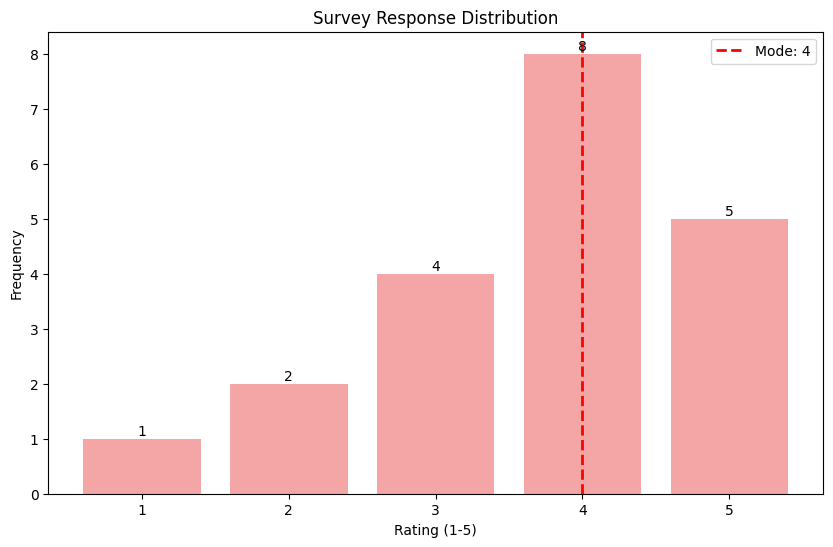

In [14]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Survey responses (Likert scale: 1-Strongly Disagree to 5-Strongly Agree)
responses = [1, 2, 3, 4, 5, 4, 3, 4, 5, 5, 4, 3, 4, 5, 4, 3, 2, 4, 5, 4]

# Frequency analysis
response_counts = Counter(responses)
response_df = pd.DataFrame({
    'Rating': list(response_counts.keys()),
    'Count': list(response_counts.values())
}).sort_values('Rating')

# Calculate statistics
mean_rating = np.mean(responses)
median_rating = np.median(responses)
mode_rating = stats.mode(responses)

print("Survey Results:")
print(f"Mean rating: {mean_rating:.2f}")
print(f"Median rating: {median_rating}")
print(f"Mode rating: {mode_rating.mode} (appears {mode_rating.count} times)")

# Visualization
plt.figure(figsize=(10, 6))
bars = plt.bar(response_df['Rating'], response_df['Count'], color='lightcoral', alpha=0.7)
plt.axvline(mode_rating.mode, color='red', linestyle='--', linewidth=2, label=f'Mode: {mode_rating.mode}')
plt.xlabel('Rating (1-5)')
plt.ylabel('Frequency')
plt.title('Survey Response Distribution')
plt.legend()

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')

plt.show()

### 4. Handling Multiple Modes

In [15]:
import pandas as pd
from scipy import stats
import numpy as np

# Dataset with multiple modes
data_multimodal = [1, 1, 2, 2, 3, 3, 4, 4, 4, 5]

# Different approaches to handle multiple modes

# 1. Using statistics.multimode (Python 3.8+)
try:
    all_modes = stats.mode(data_multimodal)
    print(f"SciPy mode: {all_modes.mode}")  # Only returns one mode
except:
    print("SciPy returns only one mode even with multiple")

# 2. Using pandas (returns all modes)
series_multimodal = pd.Series(data_multimodal)
pandas_modes = series_multimodal.mode()
print(f"Pandas modes: {list(pandas_modes)}")

# 3. Manual approach using Counter
from collections import Counter

def find_all_modes(data):
    counter = Counter(data)
    max_count = max(counter.values())
    modes = [value for value, count in counter.items() if count == max_count]
    return modes, max_count

modes, max_count = find_all_modes(data_multimodal)
print(f"Manual mode calculation: {modes} (appear {max_count} times each)")

# 4. For continuous data - binning approach
continuous_data = pd.Series([1.1, 1.2, 2.1, 2.1, 2.2, 3.0, 3.1, 3.1, 4.0])
binned_modes = pd.cut(continuous_data, bins=4).mode()
print(f"Binned modes: {list(binned_modes)}")

SciPy mode: 4
Pandas modes: [4]
Manual mode calculation: [4] (appear 3 times each)
Binned modes: [Interval(1.825, 2.55, closed='right'), Interval(2.55, 3.275, closed='right')]


## Advanced Usage

### 1. Mode with Grouped Data

In [16]:
import pandas as pd

# Sample data with groups
data = {
    'department': ['HR', 'HR', 'HR', 'Engineering', 'Engineering', 'Engineering', 'Sales', 'Sales'],
    'programming_language': ['Python', 'Python', 'Java', 'Python', 'JavaScript', 'Python', 'Java', 'Python']
}

df_tech = pd.DataFrame(data)

print("Original Data:")
print(df_tech)

# Mode by group
department_modes = df_tech.groupby('department')['programming_language'].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else 'No mode'
)

print("\nMost common programming language by department:")
print(department_modes)

Original Data:
    department programming_language
0           HR               Python
1           HR               Python
2           HR                 Java
3  Engineering               Python
4  Engineering           JavaScript
5  Engineering               Python
6        Sales                 Java
7        Sales               Python

Most common programming language by department:
department
Engineering    Python
HR             Python
Sales            Java
Name: programming_language, dtype: object


### 2. Mode with DateTime Data

In [18]:
import pandas as pd

# Most common day of the week for sales
dates = pd.date_range('2024-01-01', '2024-03-31', freq='D')
sales_days = np.random.choice(dates, 50)  # Random sales dates

# Convert to day names
day_names = [pd.Timestamp(day).strftime('%A') for day in sales_days]

day_series = pd.Series(day_names)
most_common_day = day_series.mode()

print(f"Sales occurred on {len(set(day_names))} different days")
print(f"Most common sales day(s): {list(most_common_day)}")

Sales occurred on 7 different days
Most common sales day(s): ['جمعرات']



#### Key Python Libraries Summary

| Library      | Function(s)                          | Best For                                         |
|--------------|--------------------------------------|--------------------------------------------------|
| Statistics   | `mode()`, `multimode()`              | Basic mode calculations, educational use         |
| SciPy        | `stats.mode()`                       | Numerical arrays, returns count as well          |
| pandas       | `Series.mode()`, `DataFrame.mode()`  | Data analysis, handles multiple modes well       |
| Collections  | `Counter().most_common()`            | Frequency analysis, custom mode logic            |


#### Practical Tips
- **For categorical data:** Always use mode instead of mean/median
- **Check for multiple modes:** They can reveal important patterns in your data
- **With continuous data:** Consider binning first to find ranges with highest frequency
- **In machine learning:** Mode is used for imputing missing categorical values
- **For business insights:** Mode reveals the most common customer behavior or preference

The mode is particularly valuable when you need to understand what's "typical" or "most popular" in your data, especially with categorical information!

